<a href="https://colab.research.google.com/github/higgsbelly/bitGANs-Generator/blob/main/Pixel_Art_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import shutil

from PIL import Image, ImageDraw, ImageOps

This helper function will draw a pixel at the location (x, y). Remember that (0, 0) is the TOP-LEFT corner of the canvas. For bitGANs, I assume a canvas size of 32x32 pixels.

In [ ]:
def draw_pixel(img, x, y, color, pixel_size=16):
  draw = ImageDraw.Draw(img)
  draw.rectangle([(x*pixel_size, y*pixel_size), ((x+1)*pixel_size-1, (y+1)*pixel_size-1)], fill=color)
  return img

This helper function displays colors in a palette and also demonstrates how to use the `draw_pixel()`. The argument, `pal`, is an array of colors. I found this website hepful for finding palettes: https://coolors.co/palettes/trending

In [ ]:
def print_palette(pal):
  img = Image.new('RGB', (len(pal)*16, 16))
  for i in range(len(pal)):
    img = draw_pixel(img, i, 0, pal[i])
  return img

In [ ]:
# hot pink, purple, and blue
pal = ["#f72585","#b5179e","#7209b7","#560bad","#480ca8","#3a0ca3","#3f37c9","#4361ee","#4895ef","#4cc9f0"]
img = print_palette(pal)
img

This helpful function is useful if you want to create a rectangle using the pixel coordinates.

In [ ]:
def draw_rectangle(img, x1, y1, x2, y2, color, pixel_size=16):
  if x1 == x2:
    return img
  
  if y1 == y2:
    return img
    
  draw = ImageDraw.Draw(img)
  draw.rectangle([(x1*pixel_size, y1*pixel_size), (x2*pixel_size-1, y2*pixel_size-1)], fill=color)
  return img

For bitGANs, I generally assume a canvas size of 32x32 pixels. These dimensions are multiplied by the pixels size to create the canvas.

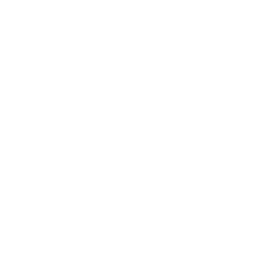

In [ ]:
pixel_size = 8

img = Image.new('RGB', (32*pixel_size, 32*pixel_size), color='#ffffff')
img

Now we can draw something! Let's create a column of pixels whose color changes based on random chance. 
* 1/3 chance of ending
* 1/3 chance of propagating the same color
* 1/3 chance of changing color

The column will start at (x, y) and proceed downward.

In [ ]:
def draw_flame(img, x, y, pal, pixel_size=16):
  # NOTE: my canvases are always 32

  i = 0
  h = y
  while (i < len(pal)) and (h < 32):
    img = draw_pixel(img, x, h, pal[i], pixel_size=pixel_size)
    h = h + 1

    # get a random number between 0 and 1
    draw = random.uniform(0, 1)

    # if that number is less than 1/3, continue looping
    if draw < 1/3:
      continue

    # if that number is less than 2/3, change color by incrementing the palette index
    elif draw < 2/3:
      i = i + 1
    
    # otherwise end 
    else:
      break

  return img

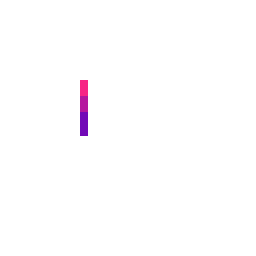

In [ ]:
pixel_size = 8
img = Image.new('RGB', (32*pixel_size, 32*pixel_size), color='#ffffff')
img = draw_flame(img, 10, 10, pal, pixel_size)
img

Here's how you can use random numbers to specify the starting location for the line. While we're at it. Let's make 10 random lines.

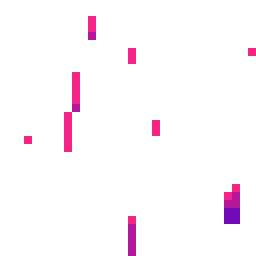

In [ ]:
pixel_size = 8
img = Image.new('RGB', (32*pixel_size, 32*pixel_size), color='#ffffff')

# how many lines should we make?
n = 10

# make the lines
for i in range(n):
  # let's pick a random location on the x-axis
  x = random.randrange(32)

  # let's pick a random location on the y-axis
  y = random.randrange(32)

  # okay, let's draw something
  img = draw_flame(img, x, y, pal, pixel_size)

img

Wow! Looks like rain!